In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Carregamento do Dataset
file_path = 'AirQualityUCI.csv'  # Substitua pelo caminho correto
data = pd.read_csv(file_path, delimiter=';', decimal=',', low_memory=False)

In [5]:
# Limpeza de Dados
data_cleaned = data.drop(columns=["Unnamed: 15", "Unnamed: 16"])

# Lidando com valores nulos nas colunas numéricas
data_cleaned.fillna(data_cleaned.median(numeric_only=True), inplace=True)

# Verificando valores nulos restantes
print("Valores nulos após preenchimento:")
print(data_cleaned.isnull().sum())

Valores nulos após preenchimento:
Date             114
Time             114
CO(GT)             0
PT08.S1(CO)        0
NMHC(GT)           0
C6H6(GT)           0
PT08.S2(NMHC)      0
NOx(GT)            0
PT08.S3(NOx)       0
NO2(GT)            0
PT08.S4(NO2)       0
PT08.S5(O3)        0
T                  0
RH                 0
AH                 0
dtype: int64


In [6]:
# Análise Exploratória de Dados (EDA)
# Estatísticas descritivas
print("Estatísticas descritivas:")
print(data_cleaned.describe())

Estatísticas descritivas:
            CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9471.000000  9471.000000  9471.000000  9471.000000    9471.000000   
mean    -33.777721  1049.038328  -159.582515     1.938317     894.600148   
std      77.286501   327.841725   139.016763    41.135649     340.266509   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   923.000000  -200.000000     4.000000     713.000000   
50%       1.500000  1053.000000  -200.000000     7.900000     895.000000   
75%       2.600000  1218.000000  -200.000000    13.500000    1102.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9471.000000   9471.000000  9471.000000   9471.000000  9471.000000   
mean    168.284553    794.978249    58.604477   1392.135889   974.673952   
std     255.897403    320.049620   126.241592    464.427530  

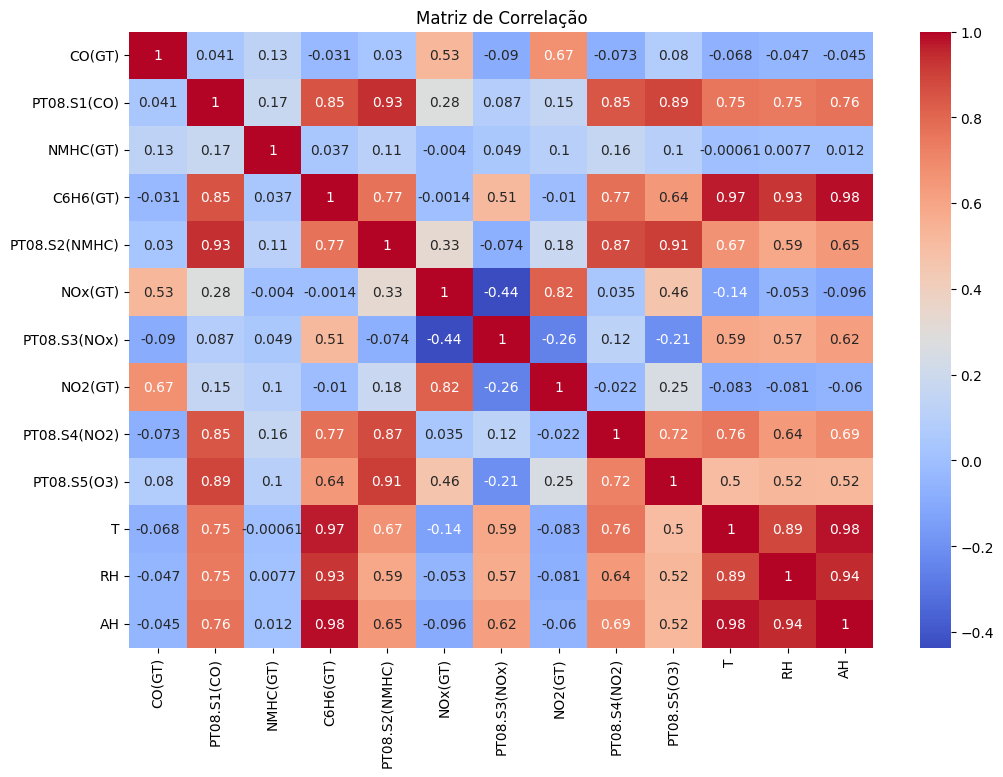

In [8]:
# Selecionando apenas colunas numéricas para a matriz de correlação
numeric_data = data_cleaned.select_dtypes(include=[np.number])

# Gerando a matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()


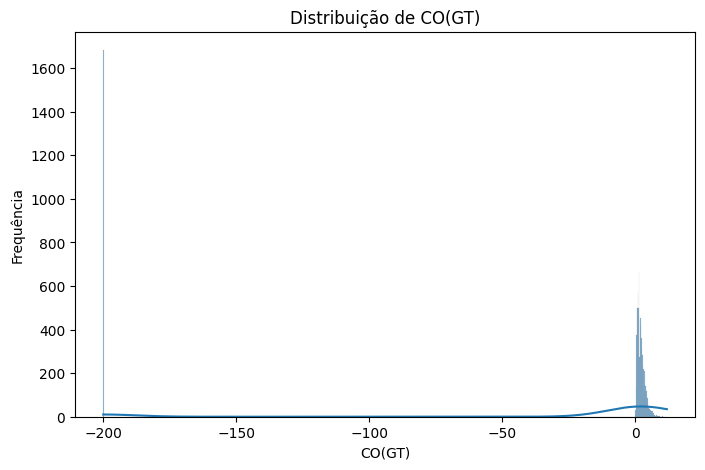

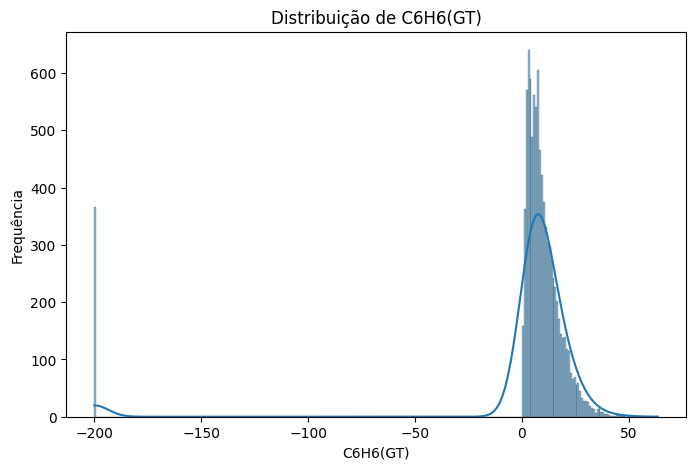

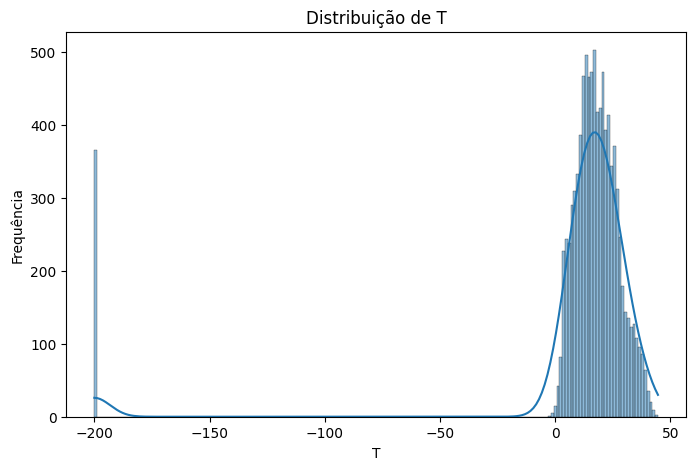

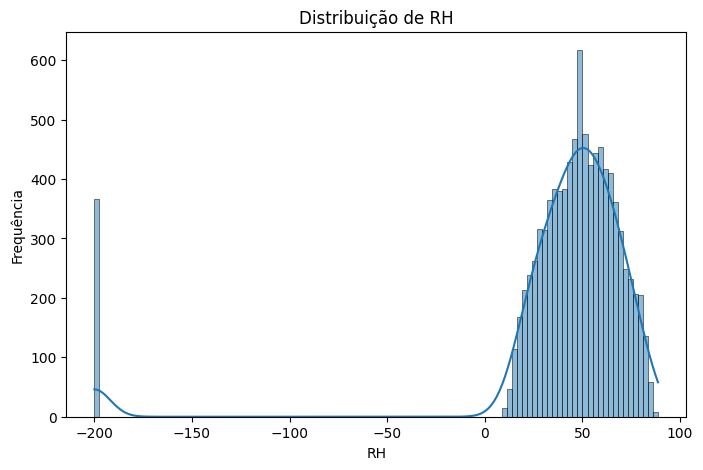

In [9]:
# Visualização de distribuições de variáveis importantes
variables_to_plot = ['CO(GT)', 'C6H6(GT)', 'T', 'RH']
for col in variables_to_plot:
    plt.figure(figsize=(8, 5))
    sns.histplot(data_cleaned[col], kde=True)
    plt.title(f"Distribuição de {col}")
    plt.xlabel(col)
    plt.ylabel("Frequência")
    plt.show()

In [13]:
# Removendo colunas 'Date' e 'Time' apenas se elas existirem no dataframe
if 'Date' in data_cleaned.columns and 'Time' in data_cleaned.columns:
    data_cleaned = data_cleaned.drop(columns=["Date", "Time"])

In [14]:
# Removendo colunas categóricas não numéricas para modelagem
data_cleaned = data_cleaned.drop(columns=["Date", "Time"], errors='ignore')

# Separação de variáveis independentes (X) e dependentes (y)
X = data_cleaned.drop(columns=["CO(GT)"])
y = data_cleaned["CO(GT)"]

# Divisão do dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Modelagem de Machine Learning
# Treinando o modelo de Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Prevendo valores no conjunto de teste
y_pred = model.predict(X_test)

# Avaliação do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 2143.3553364083914
R-squared (R²): 0.6156794397747027


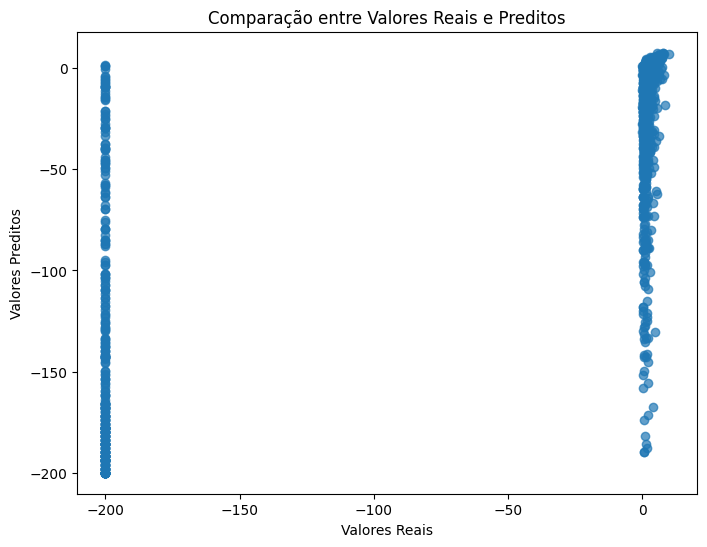

In [16]:
# Visualização dos Resultados
# Comparação entre valores reais e previstos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.title("Comparação entre Valores Reais e Preditos")
plt.show()

In [17]:
# Conclusões
print("Conclusões:")
print("O modelo de Random Forest apresentou um desempenho razoável com base no R² e MSE.")
print("A análise exploratória demonstrou padrões claros em variáveis como temperatura (T) e concentração de CO.")

Conclusões:
O modelo de Random Forest apresentou um desempenho razoável com base no R² e MSE.
A análise exploratória demonstrou padrões claros em variáveis como temperatura (T) e concentração de CO.
